<a href="https://colab.research.google.com/github/cnpnina/supervised-learning/blob/main/Lab6_1640902837.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_csv('data.csv', header = None)
print(data.head())

    0   1
0  25  79
1  34  51
2  22  53
3  27  78
4  33  59


In [ ]:
data.columns = ['X', 'Y']
print(data.head())

    X   Y
0  25  79
1  34  51
2  22  53
3  27  78
4  33  59


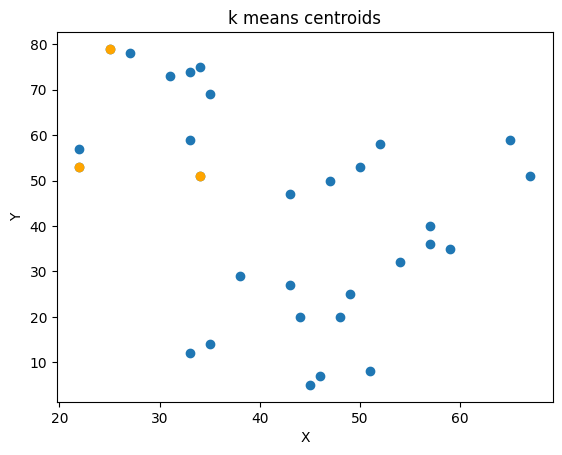

In [ ]:
C1 = (25, 79)
C2 = (34, 51)
C3 = (22, 53)


X = data['X']
Y = data['Y']
plt.scatter(X, Y)
plt.scatter(C1[0], C1[1],c = 'Orange')
plt.scatter(C2[0], C2[1],c = 'Orange')
plt.scatter(C3[0], C3[1],c = 'Orange')
#print(data.iloc[0], data.iloc[1], data.iloc[2])
plt.title('k means centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
"""""kmeans = KMeans(n_clusters=10)
kmeans.fit(data)   #data is of shape [1000,]
#learn the labels and the means
labels = kmeans.predict(data)  #labels of shape [1000,] with values 0<= i <= 9
centroids = C1, C2, C3
centroids  = kmeans.cluster_centers_

centroid_labels = [centroids[i] for i in labels]
samplesCentroids = centroids[labels]
print(samplesCentroids)"""""

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[26.         78.5       ]
 [33.5        55.        ]
 [22.         55.        ]
 [26.         78.5       ]
 [33.5        55.        ]
 [33.25       72.75      ]
 [33.25       72.75      ]
 [22.         55.        ]
 [33.25       72.75      ]
 [33.25       72.75      ]
 [66.         55.        ]
 [56.75       35.75      ]
 [56.75       35.75      ]
 [48.         52.        ]
 [48.         52.        ]
 [56.75       35.75      ]
 [56.75       35.75      ]
 [48.         52.        ]
 [66.         55.        ]
 [48.         52.        ]
 [44.4        24.2       ]
 [44.4        24.2       ]
 [34.         13.        ]
 [34.         13.        ]
 [44.4        24.2       ]
 [47.33333333  6.66666667]
 [44.4        24.2       ]
 [44.4        24.2       ]
 [47.33333333  6.66666667]
 [47.33333333  6.66666667]]


In [ ]:
C1 = (25, 79)
C2 = (34, 51)
C3 = (22, 53)
X = data['X']
Y = data['Y']

def euclidean(C1, C2, C3, data):
  print(np.sqrt(np.sum((C1 - data)**2, axis=1)))
euclidean
    #print()

<function __main__.euclidean(C1, C2, C3, data)>

In [ ]:
C1 = (25, 79)
C2 = (34, 51)
C3 = (22, 53)
X = data['X']
Y = data['Y']
def euclidean(X,Y):
  print(np.sqrt(np.sum((np.array(X) - np.array(Y))**2)))

euclidean(X,Y)

158.83009790338858


In [ ]:
C1 = (25, 79)
C2 = (34, 51)
C3 = (22, 53)
def euclidean(C1, C2, C3, data):
    Centroid1 = np.sqrt(np.sum((C1 - data)**2, axis=1))
    Centroid2 = np.sqrt(np.sum((C2 - data)**2, axis=1))
    Centroid3 = np.sqrt(np.sum((C3 - data)**2, axis=1))

    cluster = []
    for i in range(30):
      if Centroid1[i] < Centroid2[i] and Centroid1[i] < Centroid3[i]:
        cluster.append("Centroid1")
      elif Centroid2[i] < Centroid3[i] and Centroid2[i] < Centroid1[i]:
        cluster.append("Centroid2")
      elif Centroid3[i] < Centroid1[i] and Centroid3[i] < Centroid2[i]:
        cluster.append("Centroid3")
    return cluster
a = euclidean(C1, C2, C3, data)
data['cluster'] = a
#data.concat([a], axis=1)
print(data)

def centroids(data):
  cluster1= data['cluster' == "Centroid1" ]
  cluster2= data['cluster' == "Centroid2" ]
  cluster3= data['cluster' == "Centroid3" ]

  mean_cluster = sum(cluster1)/len(cluster1)
  print(mean_cluster)
centroids(data)
"""""class KNeighborsClassifier:
    def __init__(self, k = 3, dist_metric = euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)
# Test knn model across varying ks
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()"""""

     X   Y    cluster
0   25  79  Centroid1
1   34  51  Centroid2
2   22  53  Centroid3
3   27  78  Centroid1
4   33  59  Centroid2
5   33  74  Centroid1
6   31  73  Centroid1
7   22  57  Centroid3
8   35  69  Centroid1
9   34  75  Centroid1
10  67  51  Centroid2
11  54  32  Centroid2
12  57  40  Centroid2
13  43  47  Centroid2
14  50  53  Centroid2
15  57  36  Centroid2
16  59  35  Centroid2
17  52  58  Centroid2
18  65  59  Centroid2
19  47  50  Centroid2
20  49  25  Centroid2
21  48  20  Centroid2
22  35  14  Centroid2
23  33  12  Centroid2
24  44  20  Centroid2
25  45   5  Centroid2
26  38  29  Centroid2
27  43  27  Centroid2
28  51   8  Centroid2
29  46   7  Centroid2


KeyError: False